In [1]:
import sbibm
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi
from sbi.utils import BoxUniform
import torch
import pickle
import sys  
sys.path.insert(1, '../')
from collective_posterior import CollectivePosterior

task = sbibm.get_task('gaussian_linear_uniform') # See sbibm.get_available_tasks() for all tasks
prior = task.get_prior()
simulator = task.get_simulator()
observation = task.get_observation(num_observation=1)  # 10 per task

# These objects can then be used for custom inference algorithms, e.g.
# we might want to generate simulations by sampling from prior:
thetas = prior(num_samples=100_000)
xs = simulator(thetas)
theta_dim = len(prior(num_samples=1)[0])
prior_min = torch.tensor([-1]*theta_dim, dtype=torch.float32)
prior_max = torch.tensor([1]*theta_dim, dtype=torch.float32)
inf_prior = BoxUniform(low=prior_min, high=prior_max)


In [41]:
inference = SNPE(prior=inf_prior)

density_estimator = inference.append_simulations(thetas, xs).train()
posterior = inference.build_posterior(density_estimator)

# Save the posterior with pickle
with open(f'posterior_GLU.pkl', 'wb') as f:
    pickle.dump(posterior, f)


 Neural network successfully converged after 147 epochs.

In [2]:
posterior = pickle.load(open('posterior_GLU.pkl','rb'))
theta = prior()
obs = simulator(theta)
m = posterior.set_default_x(obs).sample((100,)).mean(0)

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

In [4]:
# Evaluate accuracy
n = 100
theta = prior(n)
obs = simulator(theta)
res = torch.empty(n,theta_dim)

for i in range(n):
    m = posterior.set_default_x(obs[i]).sample((200,)).mean(0)
    res[i,:] = m-theta[i]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

(array([ 1.,  0.,  1.,  6., 16., 22., 20., 19., 12.,  3.]),
 array([-1.02425218, -0.86067754, -0.6971029 , -0.53352821, -0.36995357,
        -0.20637894, -0.04280429,  0.12077036,  0.284345  ,  0.44791967,
         0.6114943 ]),
 <BarContainer object of 10 artists>)

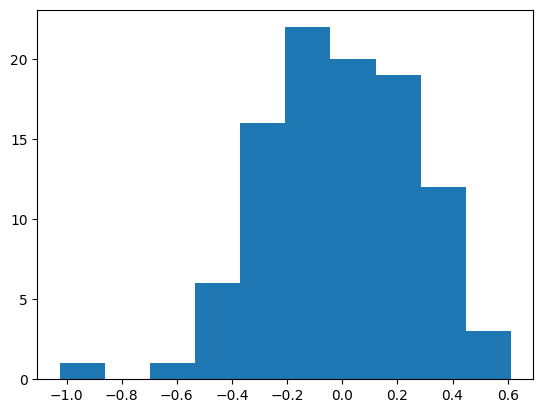

In [5]:
import matplotlib.pyplot as plt
plt.hist(res[:,0])

In [49]:
theta = prior()
X = torch.empty((10,len(observation[0])))
for i in range(10):
    X[i] = simulator(theta)[0]

In [50]:
from collective_posterior import CollectivePosterior

n_eval = 300 # N used to calculate normalizng constant
epsilon = -150 # choice is detailed later
op = CollectivePosterior(inf_prior, posterior, X, n_eval, log_C=1, epsilon=-500)
print(op.get_log_C())

tensor(-62.0667)


In [51]:
y = torch.abs(op.sample(1000).mean(0)-theta)

In [52]:
lst = torch.empty(10, len(observation[0]))
for i in range(len(X)):
    x = X[i]
    lst[i] = posterior.set_default_x(x).sample((1000,)).mean(0)-theta[0]

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

In [53]:
l = torch.abs(lst.mean(0))

(array([1., 0., 0., 2., 1., 0., 1., 2., 1., 2.]),
 array([-0.08492436, -0.06663156, -0.04833877, -0.03004598, -0.01175319,
         0.00653961,  0.0248324 ,  0.04312519,  0.06141798,  0.07971077,
         0.09800357]),
 <BarContainer object of 10 artists>)

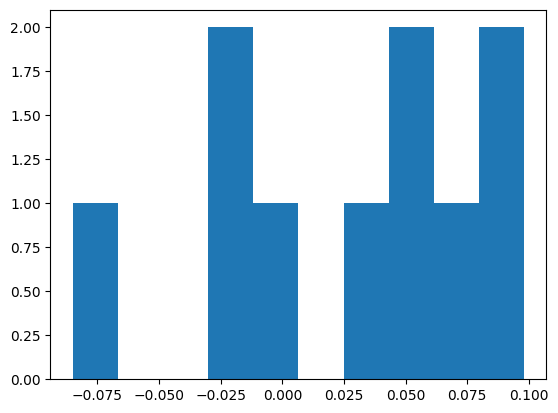

In [54]:
plt.hist(l-y)